In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lasio

In [2]:
data1=lasio.read("well-log-data/15_9-13.las")
well_data=data1.df()
well_data.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RXO,SP,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
well_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RSHA                               1623 non-null   float64
 7   RMED                               20957 non-null  float64
 8   RXO                                1627 non-null   float64
 9   SP                                 20956 non-null  float64
 10  DTC                                21282 non-null  float64
 11  NPHI                               14105 non-null  flo

In [4]:
well_data.drop(["RSHA","RXO"], axis=1, inplace=True)

In [5]:
well_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RMED                               20957 non-null  float64
 7   SP                                 20956 non-null  float64
 8   DTC                                21282 non-null  float64
 9   NPHI                               14105 non-null  float64
 10  PEF                                16446 non-null  float64
 11  GR                                 20900 non-null  flo

In [6]:
well_data_filled=well_data.fillna(well_data.mean())
well_data_filled.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
CALI                                 0
MUDWEIGHT                            0
ROP                                  0
RDEP                                 0
RMED                                 0
SP                                   0
DTC                                  0
NPHI                                 0
PEF                                  0
GR                                   0
RHOB                                 0
DRHO                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x= well_data_filled.drop("GR", axis=1)
y=well_data_filled["GR"]
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

#Select a model from sklearn map (Ridge regression)
from sklearn.linear_model import Ridge

model2=Ridge()

#fit data 
model2.fit(x_train, y_train)
model2.score(x_test,y_test)


0.5491476224165113

In [8]:
#Try another model (RandomForestRegression)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

#fit data 
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9697669955276474

In [9]:
model.fit(x_train, y_train)
model.score(x_train,y_train)

0.9973730755619605

In [10]:
#Try improving the model
#for i in range(10,100,10):
    #print(f"Trying model with {i} estimators...")
   # model=RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
  #  print (f"print Model accuracy on test set:{model.score(x_test, y_test)* 100: .2f} %")
  #  print(" ")


In [11]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
#cross_split method
from sklearn.model_selection import cross_val_score
x= well_data_filled.drop("GR", axis=1)
y=well_data_filled["GR"]

model=RandomForestRegressor()
cv_score=cross_val_score(model,x,y, cv=5)
cv_score

array([-0.09434848, -0.76988085, -1.26778385,  0.42176993, -1.87220001])

**predict model**

In [13]:
model.fit(x_train, y_train)
model.predict(x_test)
np.array(y_test)

array([32.09766769, 68.77576446, 30.65254593, ..., 99.71947479,
       78.74575806, 80.45978546])

In [14]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
np.mean(y_pred==y_test)

0.0

**Evaluate Model**

In [15]:
#Rsquared coefficient of determination is a statistical measure that represents the proportion of the variance in the target
#that is explained by the features in a regression model.
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor 
x= well_data_filled.drop("GR", axis=1)
y=well_data_filled["GR"]
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)


model=RandomForestRegressor()

#fit data 
model.fit(x_train, y_train)
model.score(x_test,y_test)

model.score(x_test,y_test)


0.9697669955276474

In [16]:
well_data_filled.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RMED,SP,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,
25.000,1.039394,60476.696223,14.766734,0.139824,28.554482,1.934587,1.777486,60.649891,206.224609,0.403497,3.46755,63.127582,2.113472,0.012935,1691.3,437628.925584,6.470978e+06,-1666.082887
25.152,1.039394,60476.696223,14.766734,0.139824,28.554482,1.934587,1.777486,60.649891,206.224625,0.403497,3.46755,63.127582,2.113472,0.012935,1691.3,437628.925584,6.470978e+06,-1666.082887
25.304,1.039394,60476.696223,14.766734,0.139824,28.554482,1.934587,1.777486,60.649891,206.224655,0.403497,3.46755,63.127582,2.113472,0.012935,1691.3,437628.925584,6.470978e+06,-1666.082887
25.456,1.039394,60476.696223,14.766734,0.139824,28.554482,1.934587,1.777486,60.649891,206.224670,0.403497,3.46755,63.127582,2.113472,0.012935,1691.3,437628.925584,6.470978e+06,-1666.082887
25.608,1.039394,60476.696223,14.766734,0.139824,28.554482,1.934587,1.777486,60.649891,206.224701,0.403497,3.46755,63.127582,2.113472,0.012935,1691.3,437628.925584,6.470978e+06,-1666.082887


In [17]:
y_test

DEPT
983.664     32.097668
1096.752    68.775764
209.680     30.652546
315.472     68.654190
3224.752    77.523834
              ...    
3271.872    22.253584
2157.256    49.519894
3101.328    99.719475
180.952     78.745758
824.368     80.459785
Name: GR, Length: 4289, dtype: float64

In [18]:
y_test.mean()

63.054710618040325

In [19]:
from sklearn.metrics import r2_score

#create an array with y_test mean
y_test_mean= np.full(len(y_test), y_test.mean())

y_test_mean[:8]

array([63.05471062, 63.05471062, 63.05471062, 63.05471062, 63.05471062,
       63.05471062, 63.05471062, 63.05471062])

In [20]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [21]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [22]:
df=pd.DataFrame(data={"actual values":y_test, "predicted values":y_pred})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
DEPT,,,
983.664,32.097668,61.956741,29.859073
1096.752,68.775764,65.454433,-3.321331
209.680,30.652546,28.675991,-1.976555
315.472,68.654190,69.781893,1.127703
3224.752,77.523834,82.748317,5.224483
3223.992,85.575981,83.117977,-2.458004
3208.032,100.196388,100.789587,0.593199
2351.664,40.483356,45.826600,5.343243
3181.280,99.558060,95.710510,-3.847550


In [23]:
np.abs(df["differences"]).mean()

2.666953672206137

In [24]:
#Evaluation using MSE
# MSE is the average of the absolute differences between predictions and actual values.
#It gives you an idea of how wrong your model predictions are

from sklearn.metrics import mean_squared_error
y_pred=model.predict(x_test)
mse= mean_squared_error(y_test, y_pred)
mse

25.270334566362283

In [32]:
df["squared_difference"]=np.square(df["differences"])
df.describe()

,actual values,predicted values,differences,squared_difference
count,4289.000000,4289.000000,4289.000000,4.289000e+03
mean,63.054711,63.011717,-0.042994,2.453536e+01
std,28.914486,27.617055,4.953709,4.254104e+02
min,6.707796,8.715388,-145.507935,1.262177e-27
25%,42.305511,42.265355,-1.817789,6.962523e-01
50%,66.092026,66.511041,0.011719,3.497063e+00
75%,81.276726,80.922013,1.912114,1.189123e+01
max,499.022583,353.514648,46.157434,2.117256e+04


In [26]:
df.to_csv("df1_new", index=True)

In [31]:
df1_new=pd.read_csv("df1_new")
df1_new.describe()

,DEPT,actual values,predicted values,differences,squared_difference
count,4289.000000,4289.000000,4289.000000,4289.000000,4.289000e+03
mean,1658.944644,63.054711,63.011717,-0.042994,2.453536e+01
std,932.128273,28.914486,27.617055,4.953709,4.254104e+02
min,25.456000,6.707796,8.715388,-145.507935,1.262177e-27
25%,851.576000,42.305511,42.265355,-1.817789,6.962523e-01
50%,1653.224000,66.092026,66.511041,0.011719,3.497063e+00
75%,2460.800000,81.276726,80.922013,1.912114,1.189123e+01
max,3283.728000,499.022583,353.514648,46.157434,2.117256e+04


Text(0.5, 1.0, 'Comparison Between Actual and Predicted Gamma Log Value')

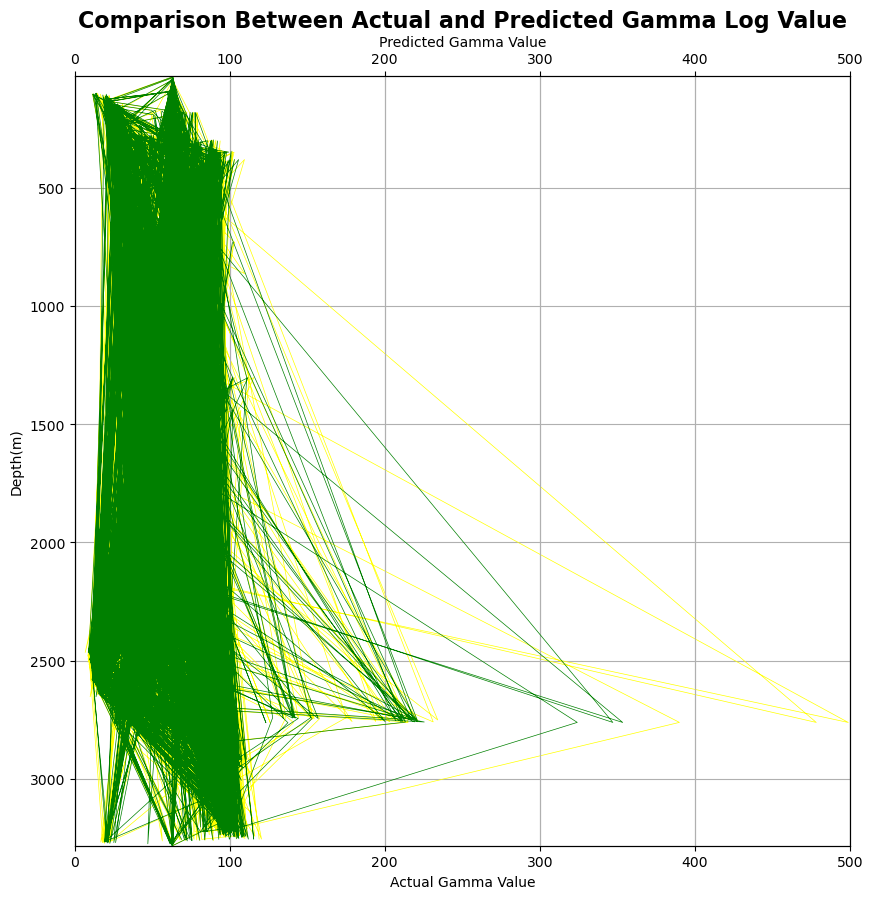

In [34]:
fig, ((ax1))= plt.subplots(nrows=1,
                                    ncols=1,
                                    figsize=(10,10))

ax1.plot("actual values", "DEPT", data=df1_new, color="yellow", lw=0.5)
ax1.set(xlabel="Actual Gamma Value",
      ylabel="Depth(m)",
       xlim=(0,500),
       ylim=(3283.728000, 25))
ax1.grid()

    
ax2=ax1.twiny()
ax2.plot("predicted values", "DEPT", data=df1_new, color="green", lw=0.5)
ax2.set(xlabel="Predicted Gamma Value",
        xlim=(0,500),
       ylim=(3283.728000, 25))
ax2.grid()


#ax1.xaxis.set_label_position("top")
#ax2.xaxis.set_label_position("top")


plt.title("Comparison Between Actual and Predicted Gamma Log Value", fontsize=16, fontweight='bold', color='black')


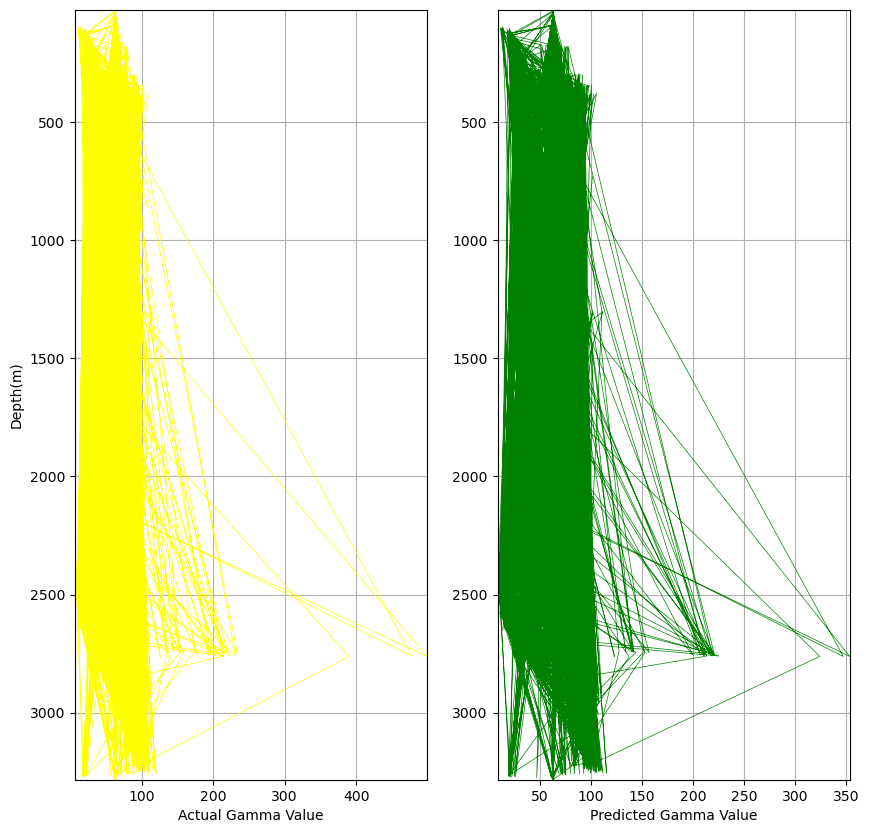

In [35]:
fig, ((ax1, ax2))= plt.subplots(nrows=1,
                                    ncols=2,
                                    figsize=(10,10))

ax1.plot("actual values", "DEPT", data=df1_new, color="yellow", lw=0.5)
ax1.set(xlabel="Actual Gamma Value",
      ylabel="Depth(m)",
       xlim=(6.707796,499.022583),
       ylim=(3283.728000, 25))
ax1.grid()

ax2.plot("predicted values", "DEPT", data=df1_new, color="green", lw=0.5)
ax2.set(xlabel="Predicted Gamma Value",
        xlim=(8.715388,353.514648),
       ylim=(3283.728000, 25))
ax2.grid()